### 1. Problem Statement 

This project understands how the students's performance (test score) is affected by other varirables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course 

### 2. Data Collection 

Dataset Source -(https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

The data consists of 8 column and 1000 rows

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape

(1000, 8)

In [4]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
data.duplicated().sum()

0

There are no missing values and no duplicates values in the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

1. From above description of numerical data, all the means are very close to each other - between 66 and 68.05;
2. All standard deviations are also close - between 14.6 and 15.19;
3. While there is a minimum score 0 for math, for writing much higher 10(minimum) and for reading 17(minimum);

In [9]:
for col in data.columns:
    print(f'Column Name {col}: {data[col].unique()}')
    print('='*40)

Column Name gender: ['female' 'male']
Column Name race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Column Name parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Column Name lunch: ['standard' 'free/reduced']
Column Name test preparation course: ['none' 'completed']
Column Name math score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Column Name reading score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  

In [10]:
## define numerical & categorical columns
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O' ]
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O' ]

## print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
## Adding columns for "Total Score" and "Average"
data['total score'] = data['math score'] + data['reading score'] + data['writing score']
data['average'] = data['total score']/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_full = data[data['reading score'] == 100]['average'].count()
writing_full = data[data['writing score'] == 100]['average'].count()
math_full = data[data['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

print('='*40)

reading_less20 = data[data['reading score'] <= 20]['average'].count()
writing_less20 = data[data['writing score'] <= 20]['average'].count()
math_less20 = data[data['math score'] <= 20]['average'].count()

print(f'Number of students with less than or equal to 20 marks marks in Maths: {math_less20}')
print(f'Number of students with less than or equal to 20 marks in Writing: {writing_less20}')
print(f'Number of students with less than or equal to 20 marks in Reading: {reading_less20}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17
Number of students with less than or equal to 20 marks marks in Maths: 4
Number of students with less than or equal to 20 marks in Writing: 3
Number of students with less than or equal to 20 marks in Reading: 1


Insights
1. From the above values we get students have performed the worst in Maths
2. Best performance is in reading section

### Visualization

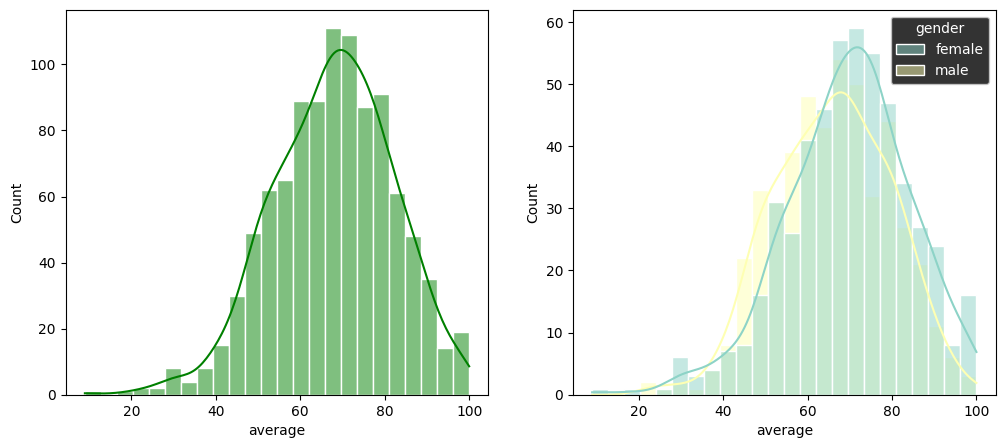

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.style.use('dark_background')
plt.subplot(121)
sns.histplot(data=data, x='average',
             kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='average',
             kde=True, hue='gender')
plt.show()

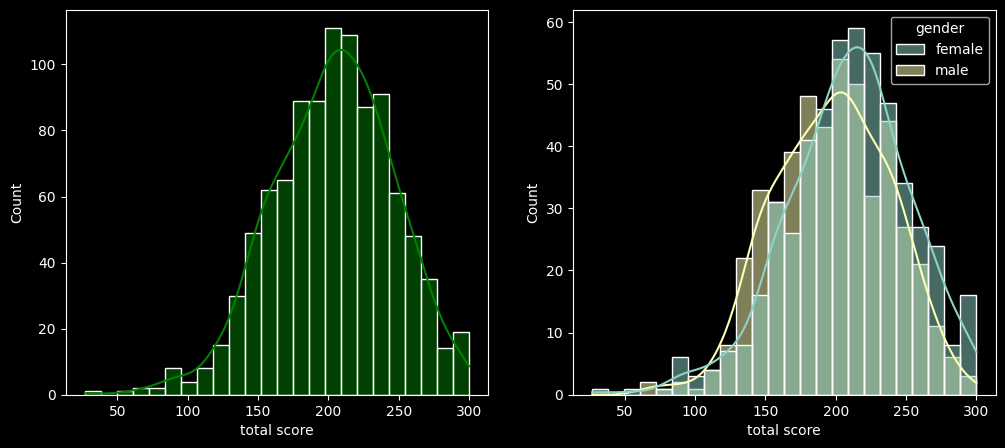

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.style.use('dark_background')
plt.subplot(121)
sns.histplot(data=data, x='total score',
             kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='total score',
             kde=True, hue='gender')
plt.show()

Insights
1. Female students tend to perform well in both on average count as well as total count then male students.

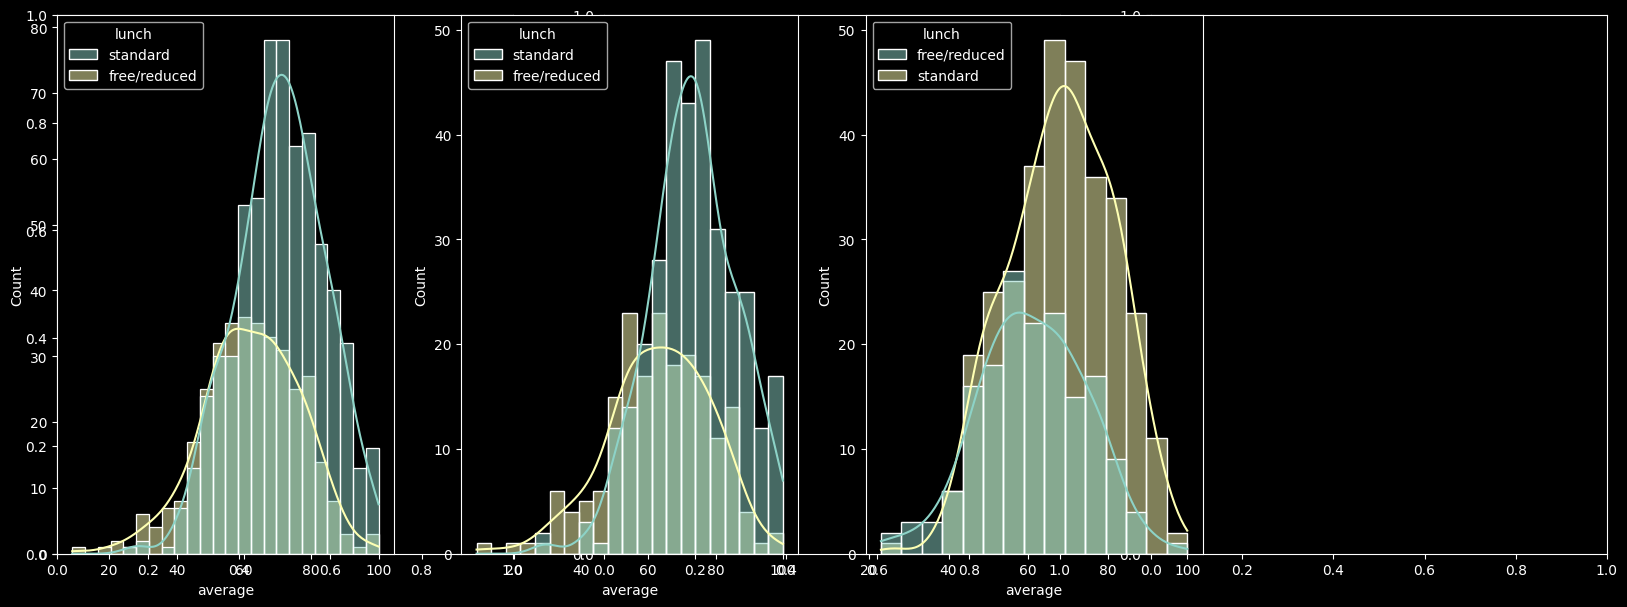

In [15]:
plt.subplots(1, 3, figsize=(20, 7))
plt.subplot(141)
sns.histplot(data=data, x='average',
             kde=True, hue='lunch'
             )
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'], x='average',
             kde=True, hue='lunch'
             )
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'], x='average',
             kde=True, hue='lunch'
             )
plt.show()

## Insights
1. Standard lunch helps perform well in exams.
2. Both in male and female, standard lunch helps to perform well

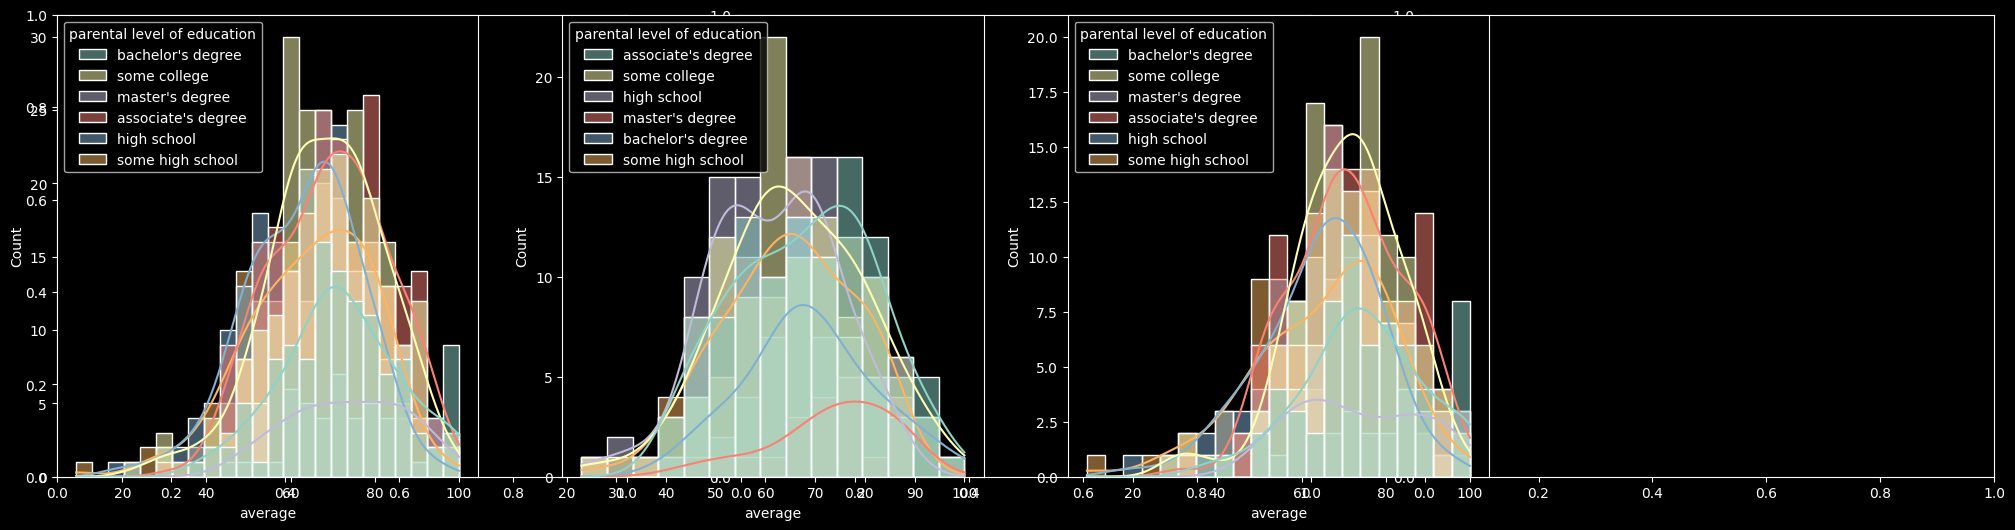

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

# Insights
1. In general parent's education don't help student perform well in exam.
2.  2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3. 3rd plot we can see there is no effect of parent's education on female students.

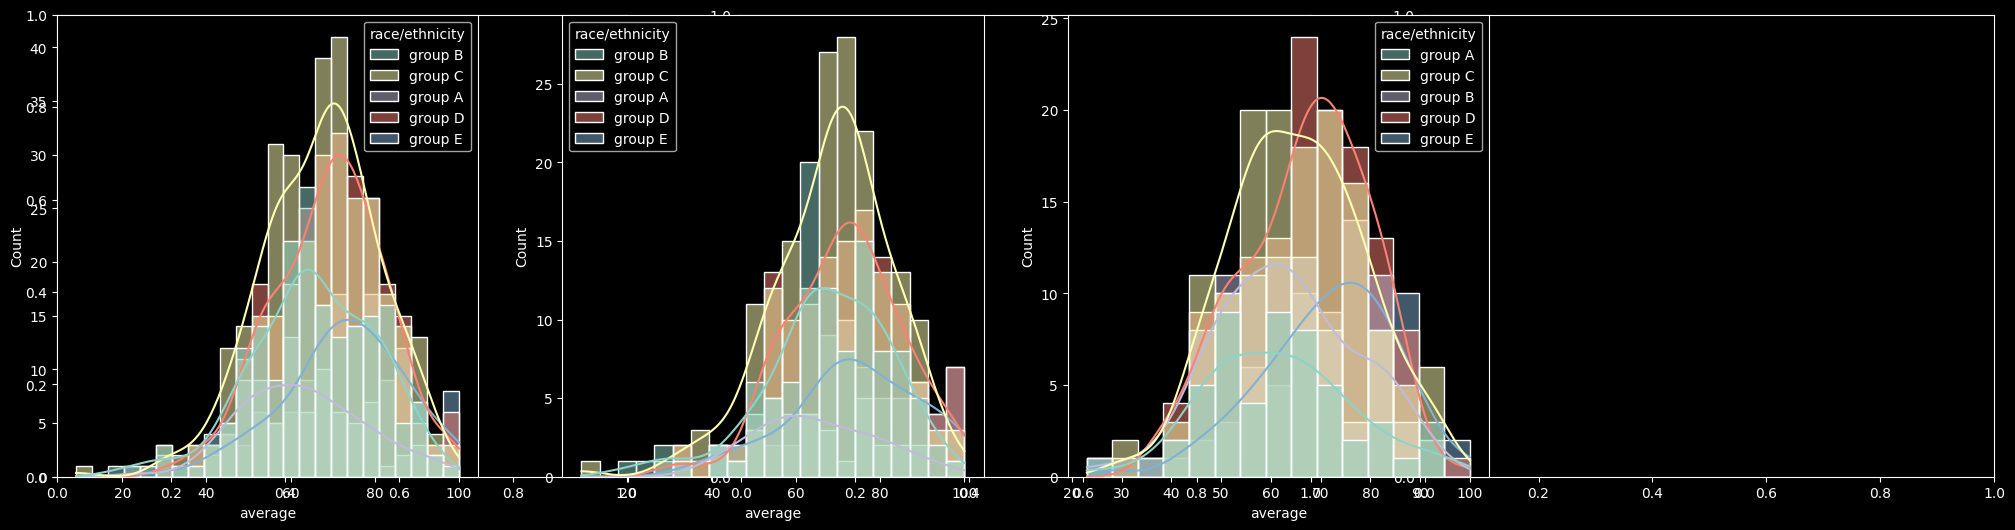

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

# Insights
1. Students of group A and group B tends to perform poorly in exam.
2. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female but group C for females and group D for males are performaning well in exams 

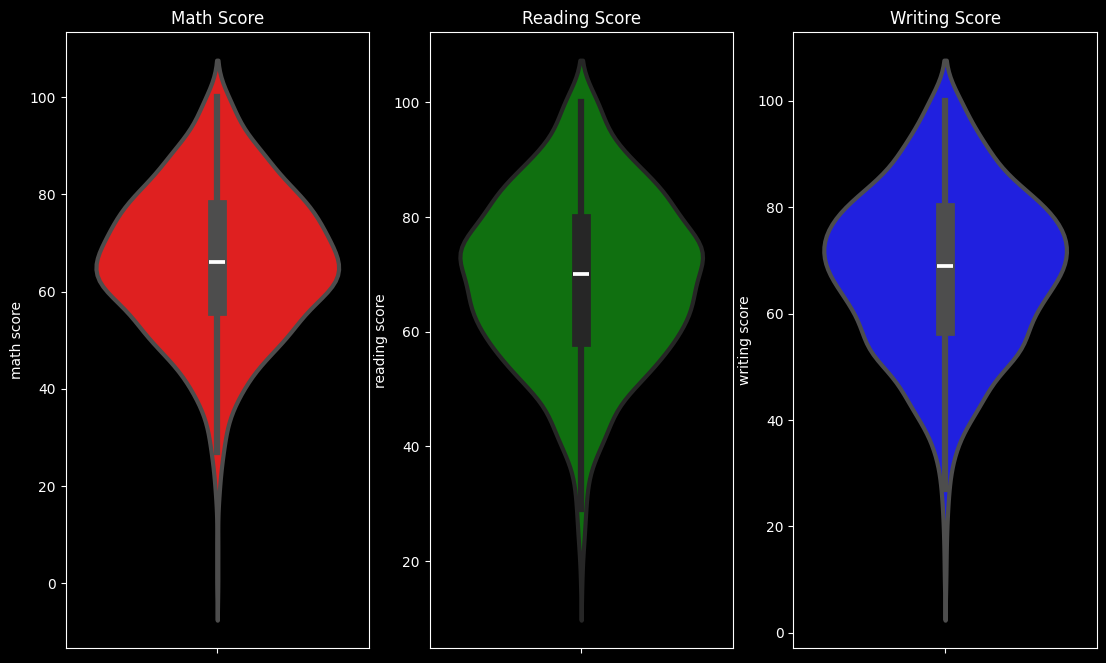

In [18]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Math Score')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading Score')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Writing Score')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

# Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

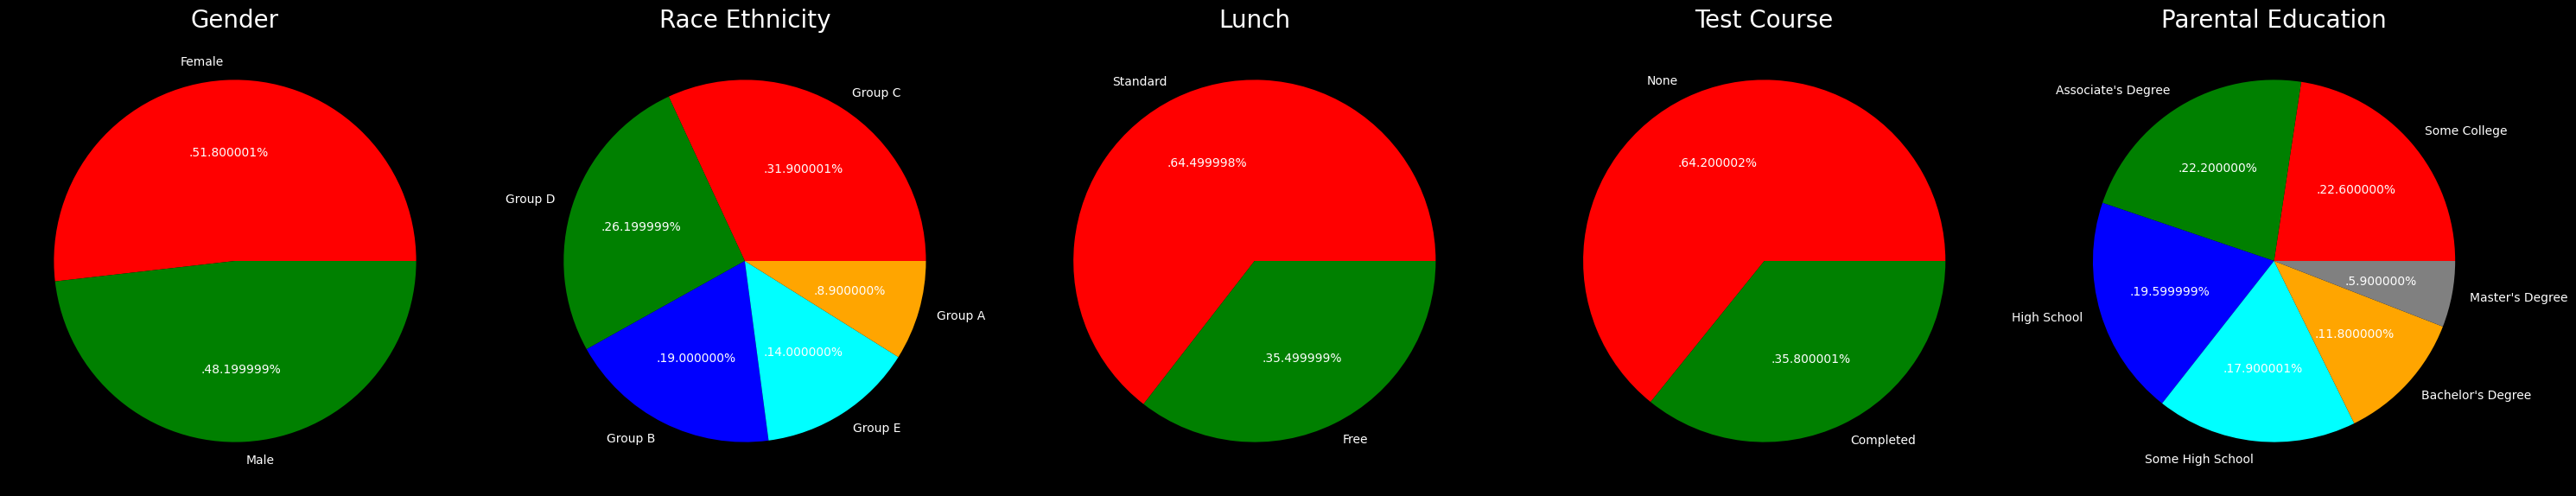

In [20]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = data['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

# Insights
1. Male and Female students are almost equal.
2. More students are available in Group C.
3. Number of students who have standard lunch are greater.
4. Number of students who have not enrolled in any test preparation course is greater.
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree".

# Gender Column
1. How is distribution of Gender ?
2. Is gender has any impact on student's performance ?

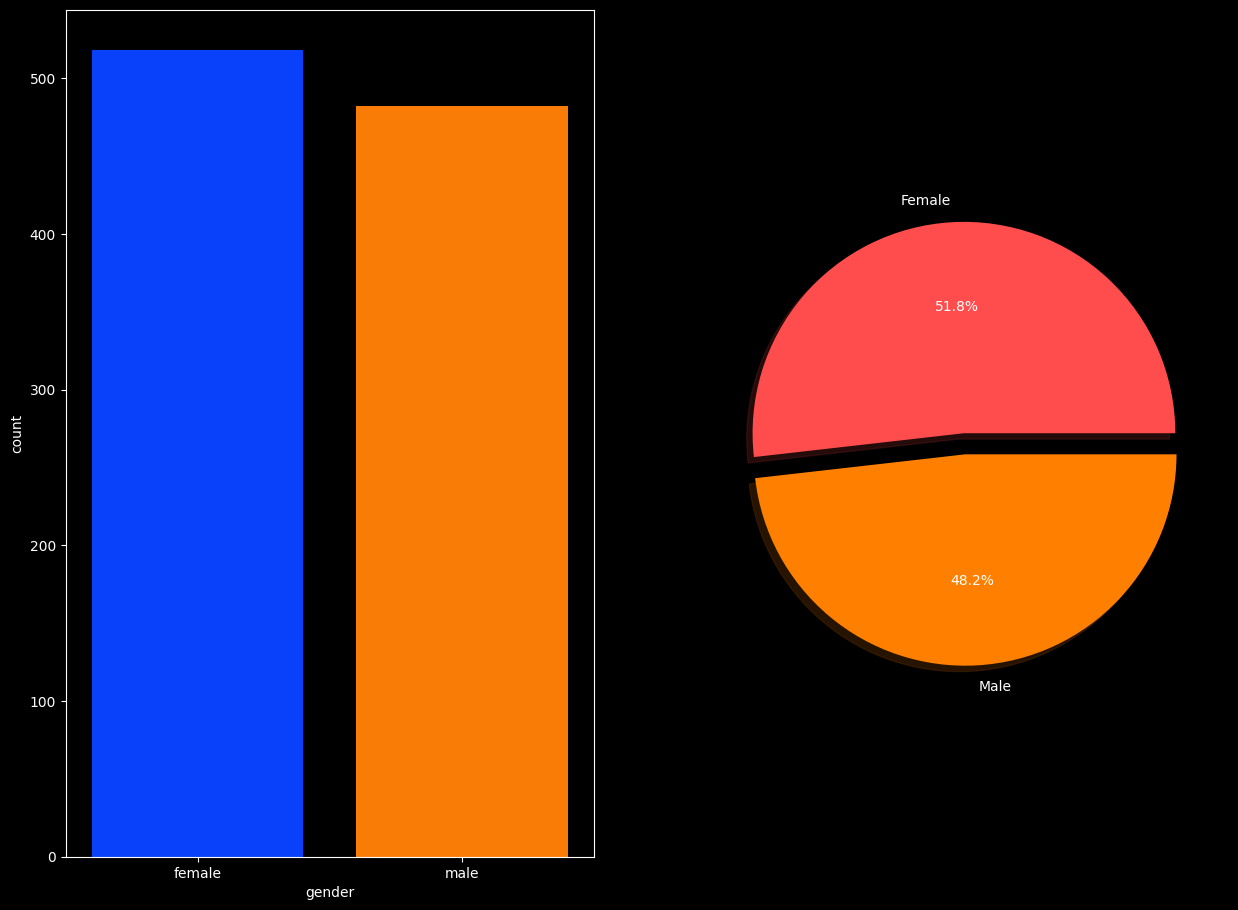

In [26]:
f,ax=plt.subplots(1,2,figsize=(15,11))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

# Insights
Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

In [29]:
gender_group = data.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


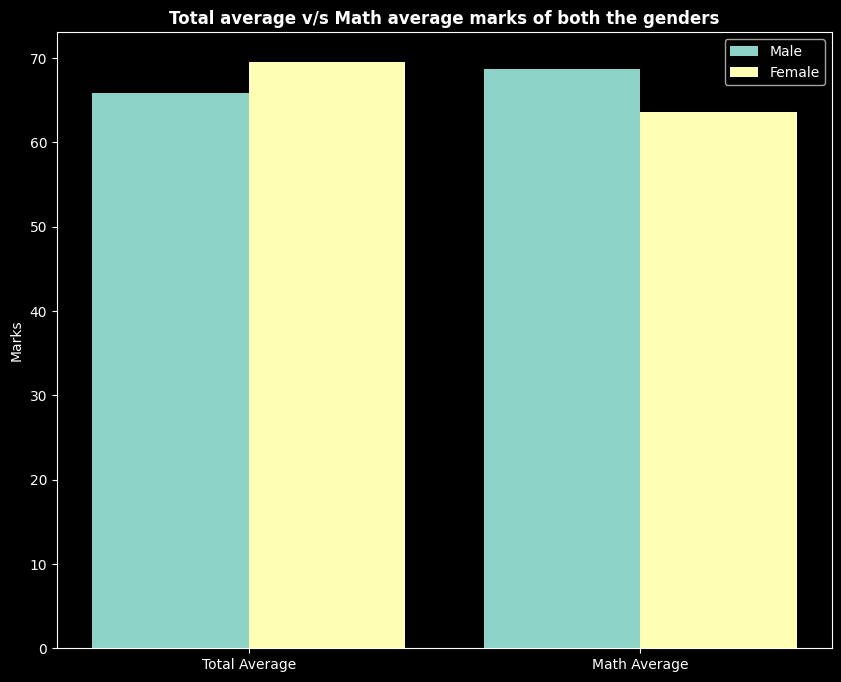

In [31]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

# Insights
 On an average females have a better overall score than men whereas males have scored higher in Maths.

# RACE/EHNICITY COLUMN
How is Group wise distribution ?
Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

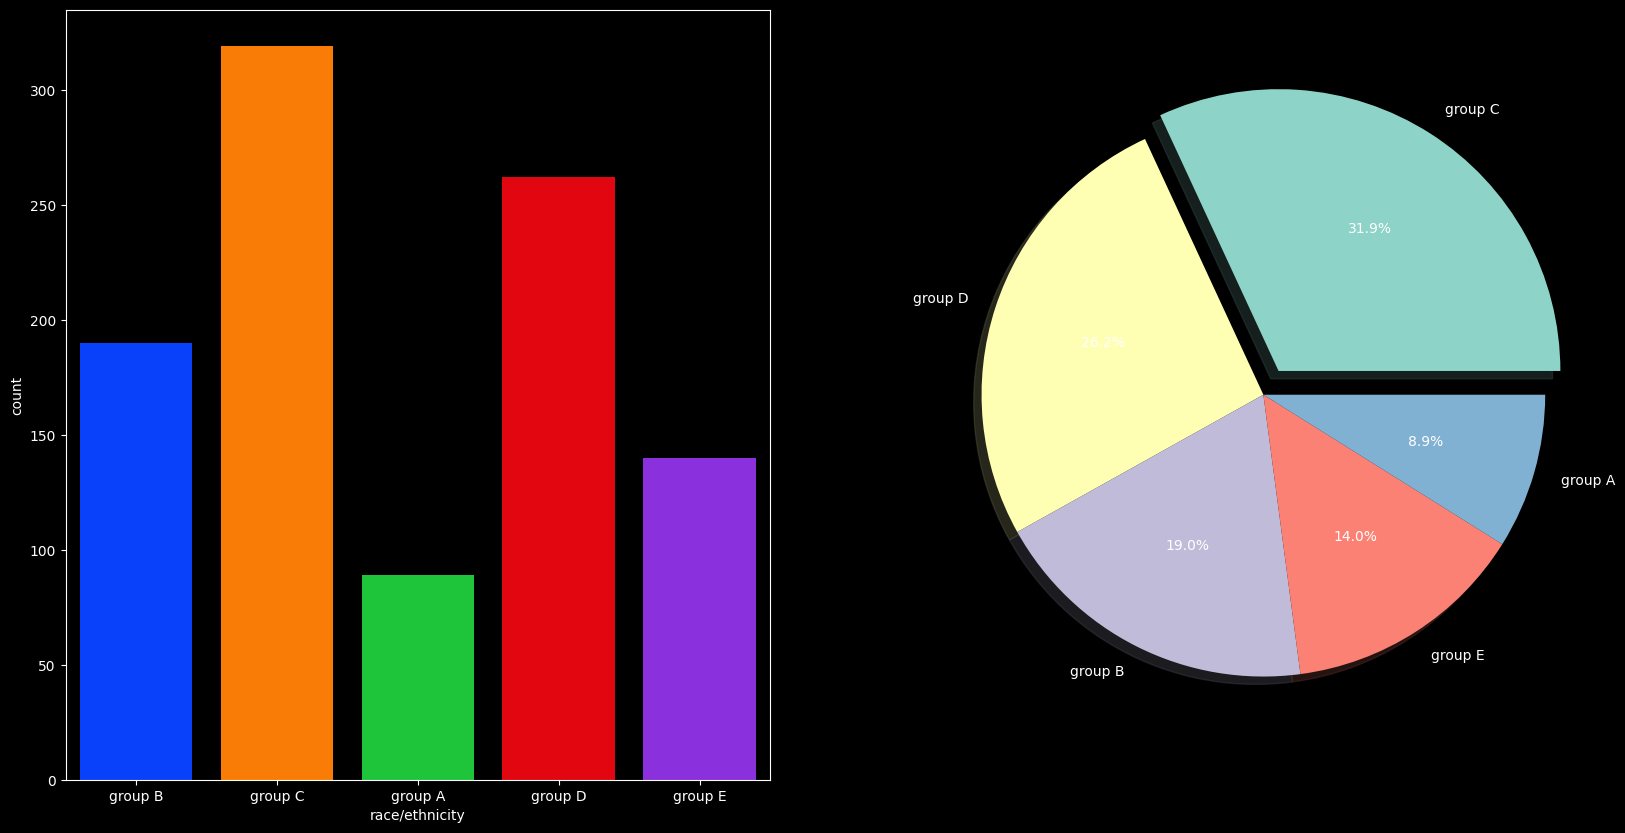

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race/ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race/ethnicity'].value_counts(),labels=data['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

# Insights
1. Most of the student belonging from group C /group D.
2. Lowest number of students belong to groupA.

# Bivariate Analysis 
Is Race/Ehnicity has any impact on student's performance ?

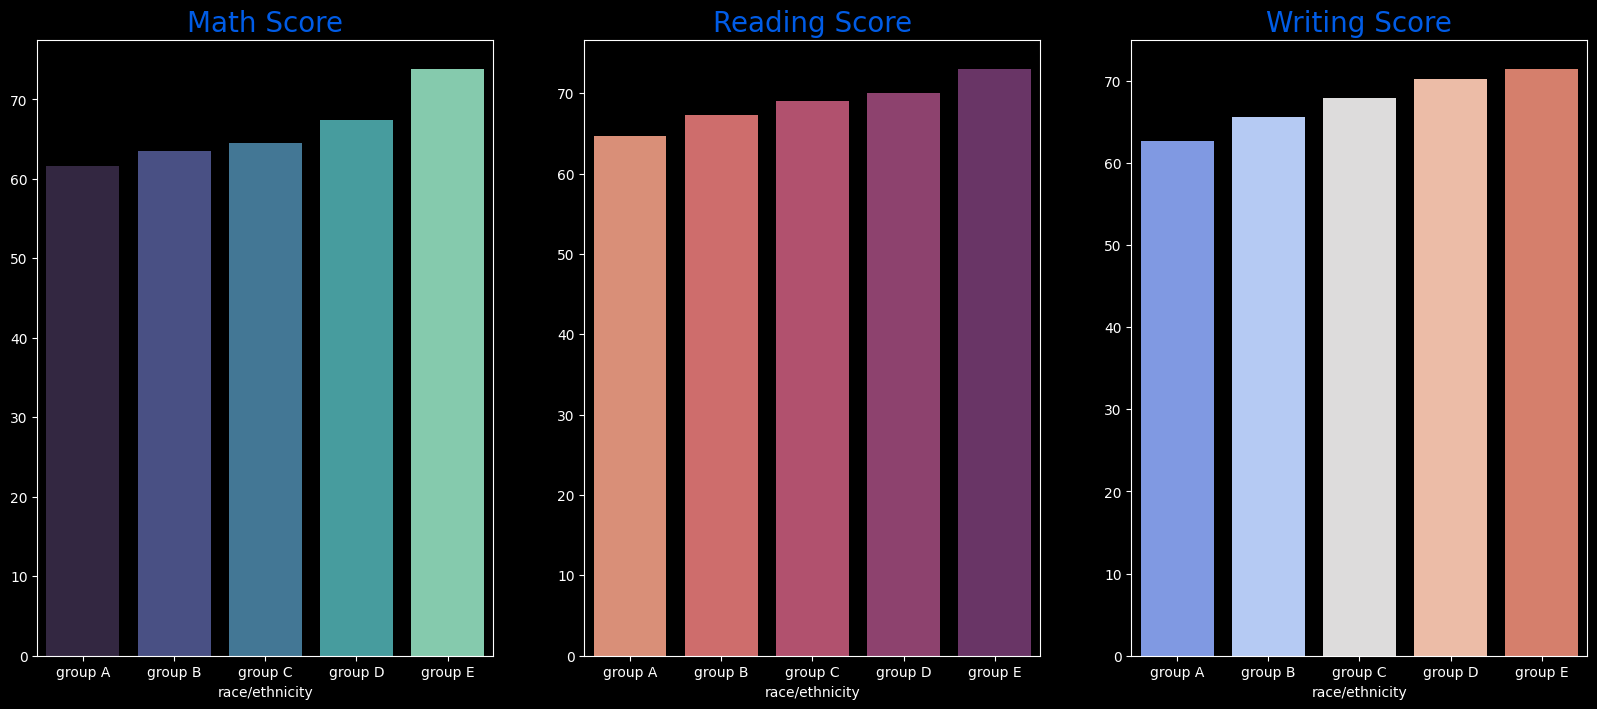

In [33]:
Group_data2=data.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading Score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing Score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

# Insights
1. Group E students have scored the highest marks.
2. Group A students have scored the lowest marks.
3. Students from a lower Socioeconomic status have a average in all course subjects

<Axes: >

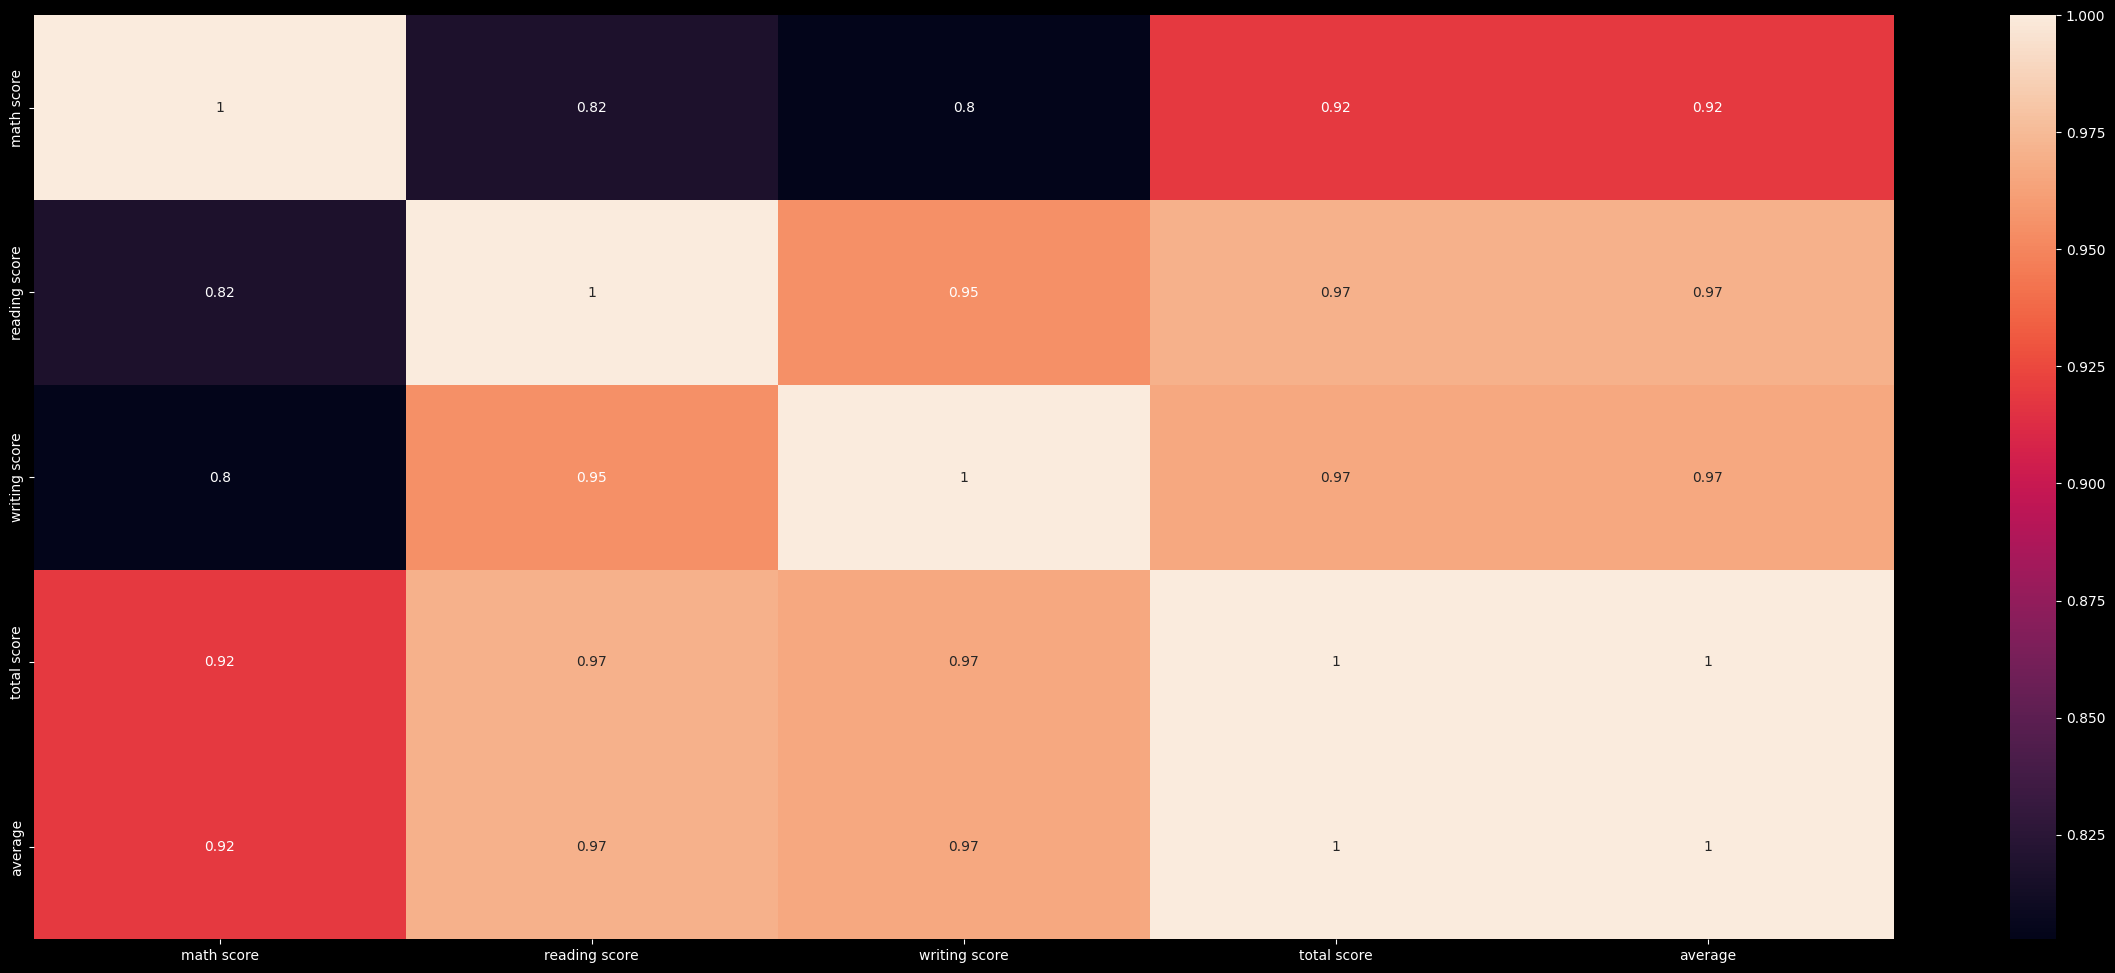

In [35]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

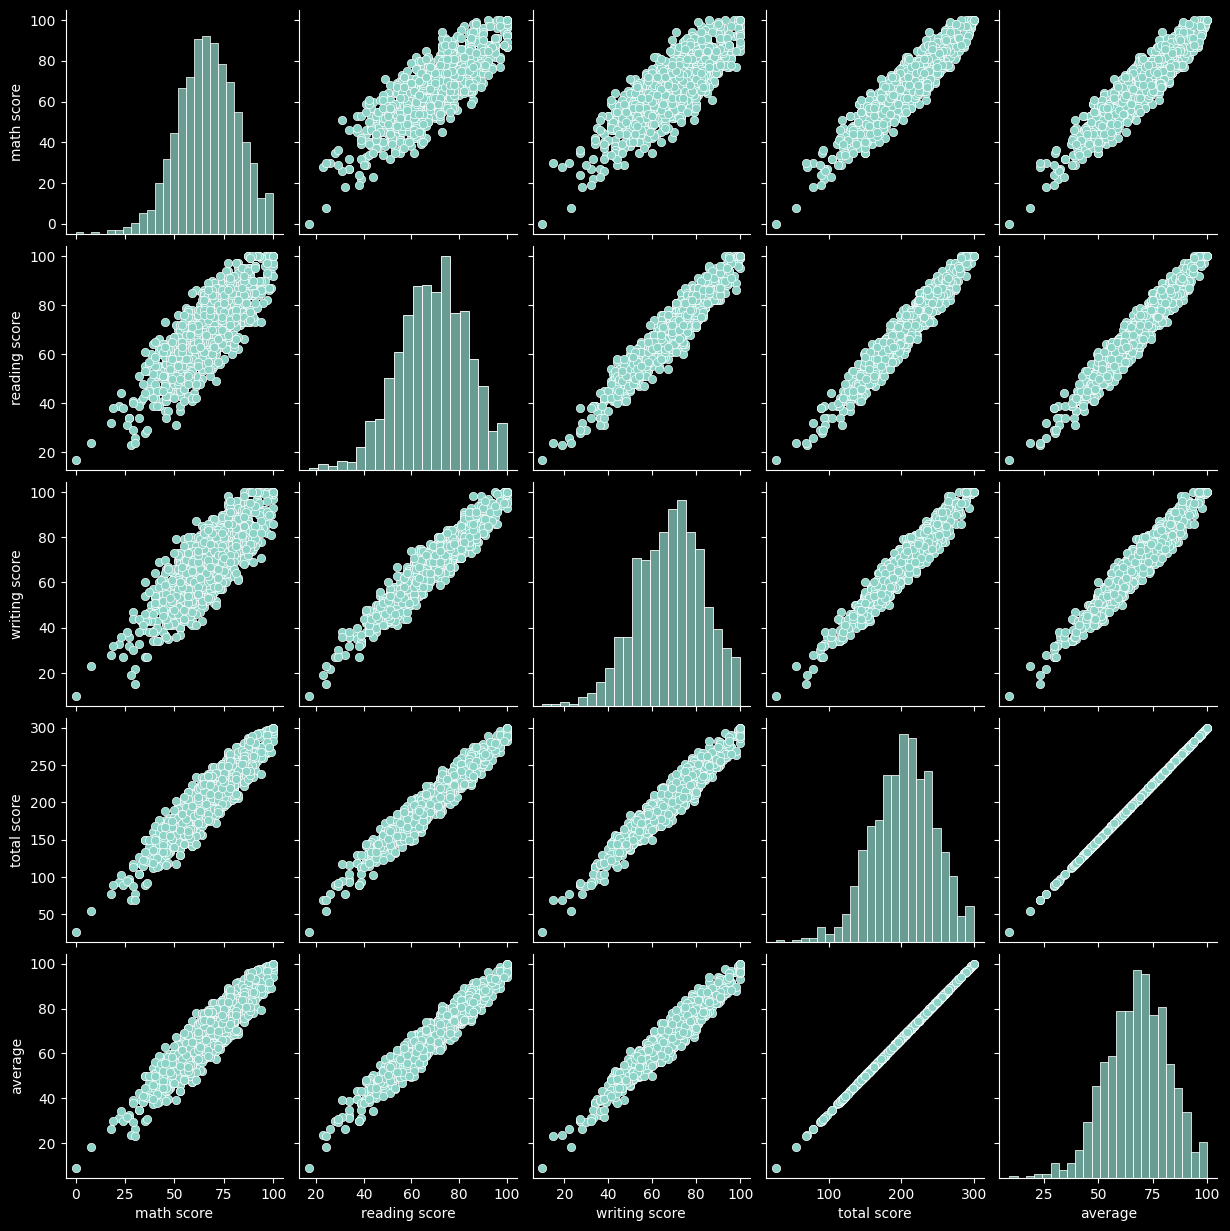

In [36]:
sns.pairplot(data)

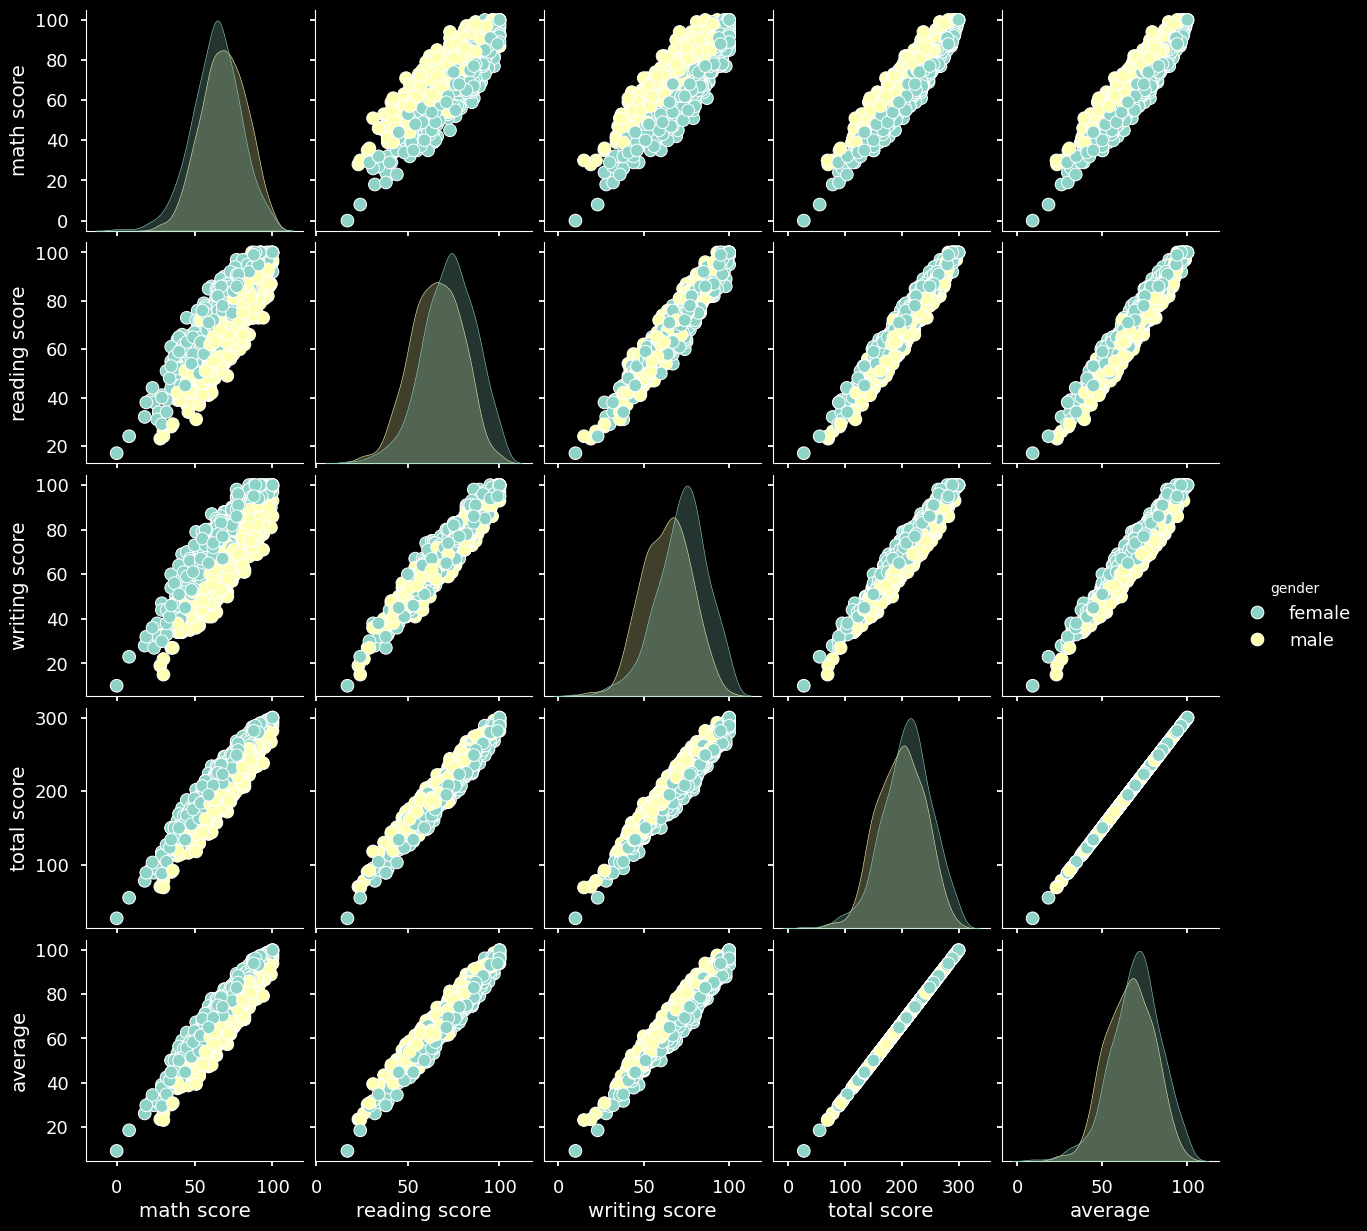

In [43]:
sns.pairplot(data,hue = 'gender')
plt.show()

# Bivariate Analysis 
Is parental education has any impact on student's performance?

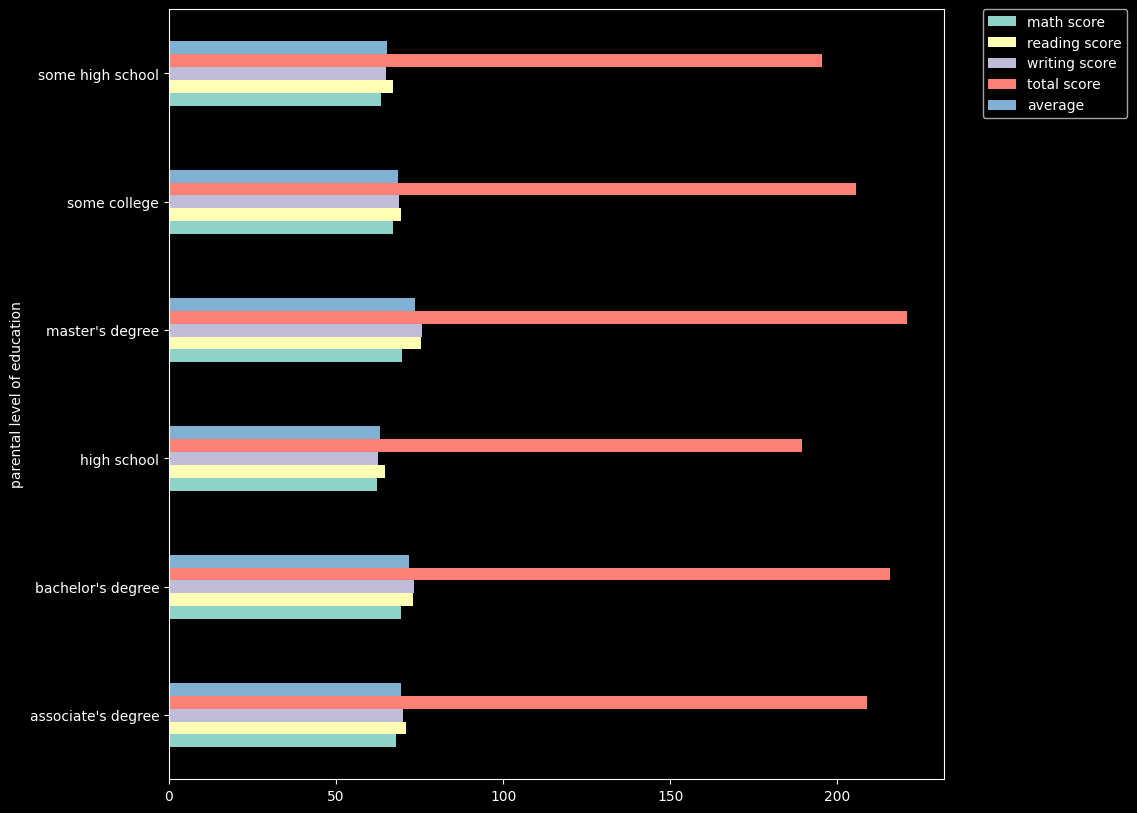

In [38]:
data.groupby('parental level of education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Insights
The score of student whose parents possess bachelors and masters level education are higher than others.

# Lunch Column
1. Which type of lunch is most common amoung students ?
2. What is the effect of lunch type on test results?

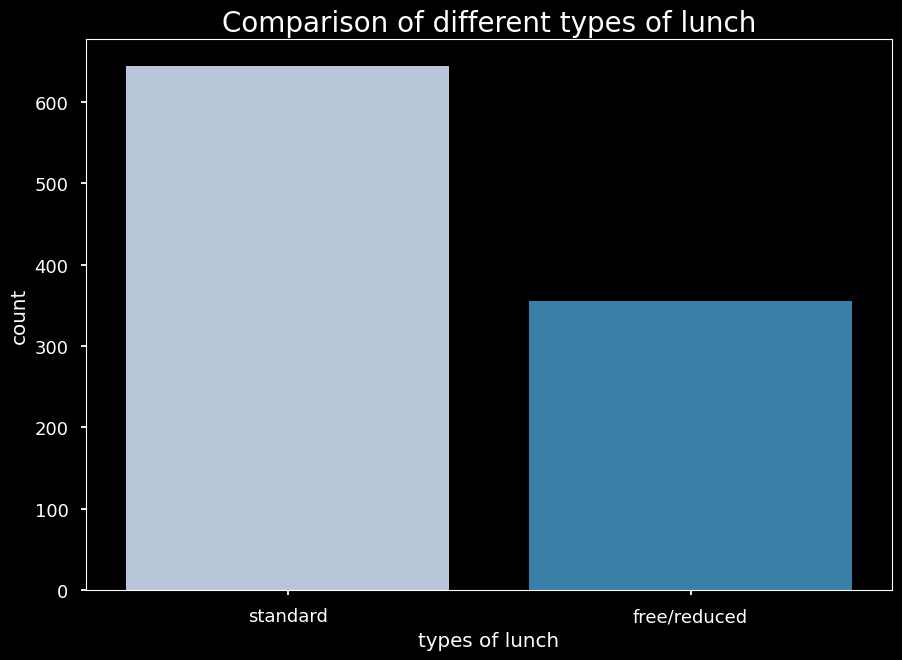

In [40]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk') 

sns.countplot(x = data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

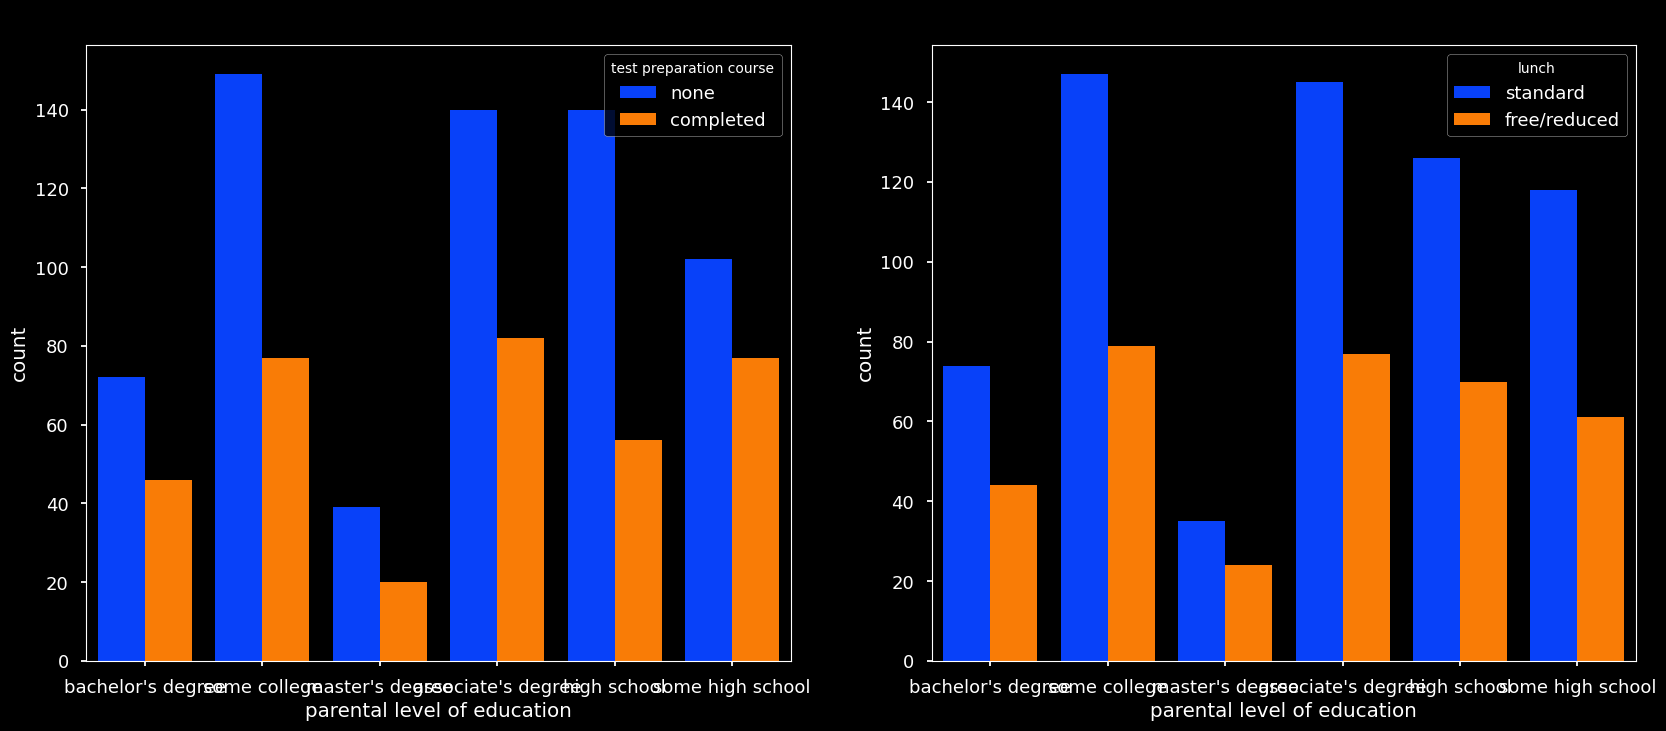

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=data['parental level of education'],data=data,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=data['parental level of education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

# Insights
Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

# Outlier Checking 

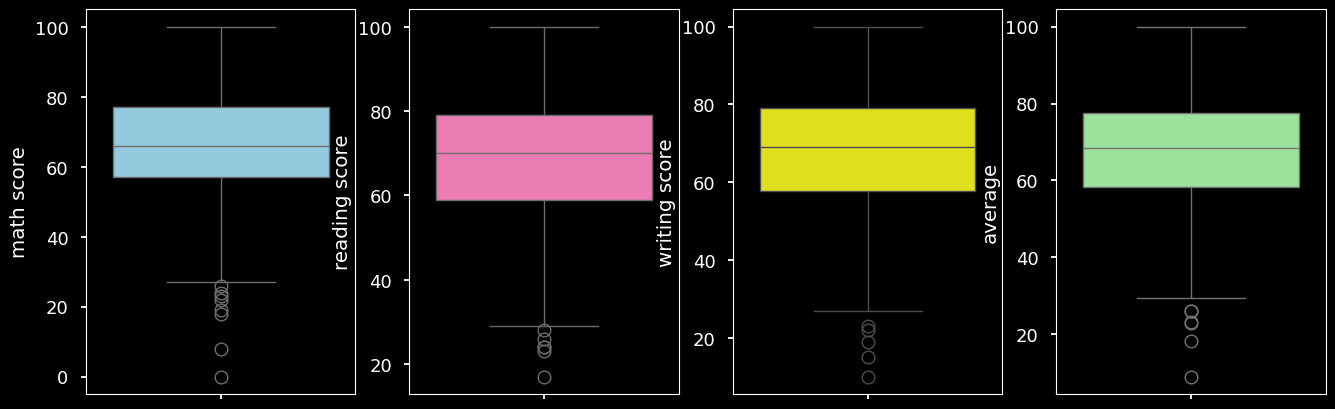

In [44]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average'],color='lightgreen')
plt.show()

# Conclusions

1. Student's Performance is related with lunch, race, parental level education

2. Females lead in pass percentage and also are top-scorers

3. Student's Performance is not much related with test preparation course

4. Finishing preparation course is benefitial.